# K-Nearest Neighbours From Scratch

## 1. Imports

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")
from sklearn import datasets

## 1.1 Generating the Dataset

In [80]:
# generate dataset for KNN classification
samples = 1500
features = 2
noise = 0
classes = 2


# making the 
x, y = datasets.make_blobs(n_samples=samples, 
                          centers=classes, 
                          n_features=features,
                          cluster_std=3.0,
                          random_state=0)

In [81]:
# building the dataframe
data = {}
for i in range(0, x.shape[1]):
    data[f"f{i + 1}"] = x[:, i]
data["class"] = y

df = pd.DataFrame(data = data)

## 1.2 Visualisation

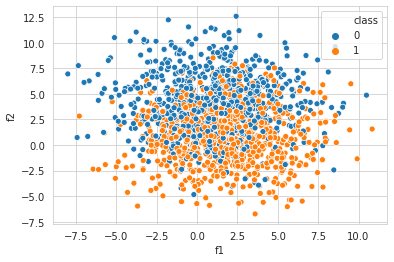

In [82]:
sns.scatterplot(x = "f1",
               y = "f2",
               hue = "class",
               data = df);

## 2.0 Implementing the KNN algorithm

In [83]:
# the below function will split the data into train, test and cross validation
def train_cv_test_split(data = [x, y], cv_split = 0.2, test_split = 0.2, verbose = 1):
    input_shape = x.shape[1]
    total_points = x.shape[0]
    input_vars, output_vars = x, y
    
    cv = int(total_points  * cv_split)
    test= int(total_points * test_split)
    train= total_points - (cv + test)
    
    # training data
    x_train, y_train = x[0 : train, :], y[0 : train]
    x_cv, y_cv = x[train: train + cv, : ], y[train: train + cv]
    x_test, y_test =  x[train + cv : total_points, : ], y[train + cv: total_points]
    
    if verbose:
        print("Training Data shape:", x_train.shape)
        print("Test Data shape:", x_test.shape)
        print("Cross-Validation Data shape:", x_cv.shape)
    return x_train, y_train, x_test, y_test, x_cv, y_cv

In [84]:
# function for getting the accuracy
def accuracy(y_real, y_pred):
    return round((np.array(y_pred == y_real).sum() / y_real.shape[0]) * 100, 2)

In [85]:
# Program to find most frequent 
def majority_vote(List): 
    counter = 0
    num = List[0] 
    for i in List: 
        curr_frequency = List.count(i) 
        if(curr_frequency> counter): 
            counter = curr_frequency 
            num = i 

    return num 

In [86]:
# splitting the dataset
x_train, y_train, x_test, y_test, x_cv, y_cv = train_cv_test_split(data = [x, y],
                                                                         cv_split = 0.2,
                                                                         test_split = 0.2,
                                                                         verbose = 1)

Training Data shape: (900, 2)
Test Data shape: (300, 2)
Cross-Validation Data shape: (300, 2)


In [87]:
# the KNN algorithm
# the cross validation data is used to determine the right k
# the training data is used for getting neighbours
# the test data is used for testing

def KNN(train = [x_train, y_train], cv = [x_cv, y_cv], test_data = [x_test, y_test], k = 5):
    x_train, y_train = train[0], train[1]
    x_cv, y_cv = cv[0], cv[1]
    x_test, y_test = test_data[0], test_data[1]
    
    predicted = []
    for query in x_cv:
        neighbour_distances = {}
        for datapoint, dataclass in zip(x_train, y_train):
            distance = np.linalg.norm(query - datapoint) 
            neighbour_distances[distance] = dataclass
            
        neightbour_distance_list = sorted(neighbour_distances.items())
        class_label = [j for i, j in neightbour_distance_list[0:k]]
        
        y_pred = majority_vote(class_label)
        predicted.append(y_pred)
        
    y_preds = np.array(predicted)
    val_acc = accuracy(y_cv, y_preds)
    
    
    predicted = []
    for query in x_test:
        neighbour_distances = {}
        for datapoint, dataclass in zip(x_train, y_train):
            distance = np.linalg.norm(query - datapoint) 
            neighbour_distances[distance] = dataclass
            
        neightbour_distance_list = sorted(neighbour_distances.items())
        class_label = [j for i, j in neightbour_distance_list[0:k]]
        
        y_pred = majority_vote(class_label)
        predicted.append(y_pred)
        
    y_preds = np.array(predicted)
    test_acc = accuracy(y_test, y_preds)    
    
    return val_acc, test_acc

In [88]:
# for determining the right k value
def determing_k(k_vals = [1, 10], plot = True):
    plot_test = []
    plot_val = []
    k_values = []
    start_k, end_k = k_vals[0], k_vals[1]
    for k in range(start_k, end_k + 1):
        val_acc, test_acc = KNN(train = [x_train, y_train],
                                cv = [x_cv, y_cv],
                                test_data = [x_test, y_test],
                                k = k)
        k_values.append(k)

        plot_test.append(test_acc)
        plot_val.append(val_acc)
    if plot:
        plt.plot(k_values, plot_val , color = "red", label = "Val accuracy")
        plt.plot(k_values, plot_test,color = "green", label = "Test accuracy")
        plt.xlabel("K values")
        plt.ylabel("Accuracy")
        plt.legend(loc="upper left")
        plt.show()


In [89]:
# Function for making prediction
def predict(k_value = 5, neighbours = [x_train, y_train], query = None):
    x_train, y_train = neighbours[0], neighbours[1]
    if query is not None:
        query = np.array(query)
        neighbour_distances = {}
        for datapoint, dataclass in zip(x_train, y_train):
            distance = np.linalg.norm(query - datapoint) 
            neighbour_distances[distance] = dataclass
            
        neightbour_distance_list = sorted(neighbour_distances.items())
        class_label = [j for i, j in neightbour_distance_list[0:k_value]]
        
        predicted = majority_vote(class_label)
        
    return predicted

## 2.1 Determining the right "k" value

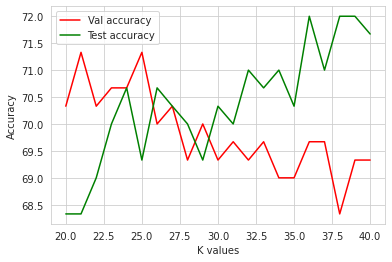

In [90]:
# Choose the right K value
determing_k(k_vals = [20, 40], plot = True)

## 2.2  Making prediction

In [91]:
predict(k_value = 30, query = [7.5, 7.5])

0